In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop(["Id"],axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
a=df.iloc[:,[0,1,2,3]].values

In [ ]:
wcss=[]
for i in range(1,11) :
  model1=KMeans(n_clusters=i,init="k-means++",random_state=0)
  model1.fit(a)
  wcss.append(model1.inertia_)


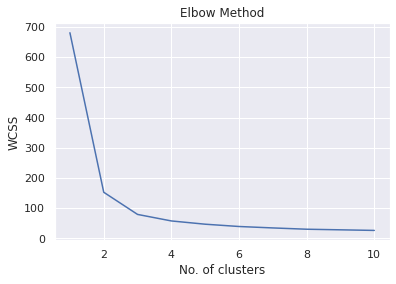

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model2=KMeans(n_clusters=3,init="k-means++",random_state=0)

In [ ]:
b=model2.fit_predict(a)

In [ ]:
species=df.iloc[:,df.columns=='Species']
species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


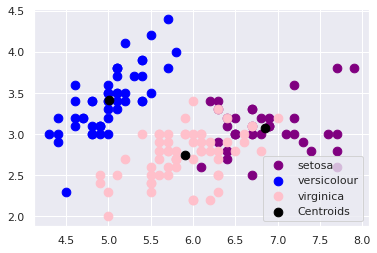

In [ ]:
plt.scatter(a[b == 0, 0], a[b == 0, 1], s = 75, c = 'purple', label = 'setosa')
plt.scatter(a[b == 1, 0], a[b == 1, 1], s = 75, c = 'blue', label = 'versicolour')
plt.scatter(a[b == 2, 0], a[b == 2, 1], s = 75, c = 'pink', label = 'virginica')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:,1], s = 75, c = 'black', label = 'Centroids')
plt.legend()